In [1]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
tf.__version__

'1.14.0'

In [3]:
mnist = keras.datasets.mnist

In [4]:
mnist

<module 'keras.datasets.mnist' from '/home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/datasets/mnist.pyc'>

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

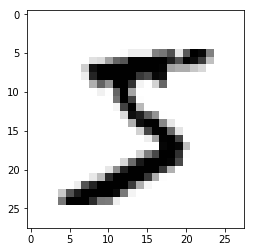

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [9]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= tf.nn.relu))
model.add(keras.layers.Dense(128, activation= tf.nn.relu))
model.add(keras.layers.Dense(10, activation= tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train, epochs=3)

W0619 21:16:08.609431 140518301898496 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 21:16:08.648516 140518301898496 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 21:16:08.665903 140518301898496 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 21:16:08.723457 140518301898496 deprecation_wrapper.py:119] From /home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.


Epoch 1/3
60000/60000 [==============================] - 5s 86us/step - loss: 0.2622 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 5s 79us/step - loss: 0.1066 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.0726 - acc: 0.9774


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 32us/step
(0.0953097640004009, 0.9708)


In [21]:
model.save('epic_num_reader.model')

In [23]:
new_model = keras.models.load_model('epic_num_reader.model')

In [24]:
predictions = new_model.predict([x_test])

In [ ]:
print(np.argmax(prediction))